# Preprocessing Steps

UCSD DSC180A FA20

Brandon Tsui

Xuanyu Wu

**Purpose of this notebook:** This notebook contains the details of the preprocessing steps of this result replication project. 

## 1. Initial quality check 

In this step, we mainly look for whether the fastq files contain any adapters that may give us biased results infuture analysis steps. So, we run FastQc on our test dataset and check the outputs. If we find adapters in the sequence file, then we will feed the file into cutadapt to remove them.

A sample output of FastQc ran on a file without adapters looks like this:

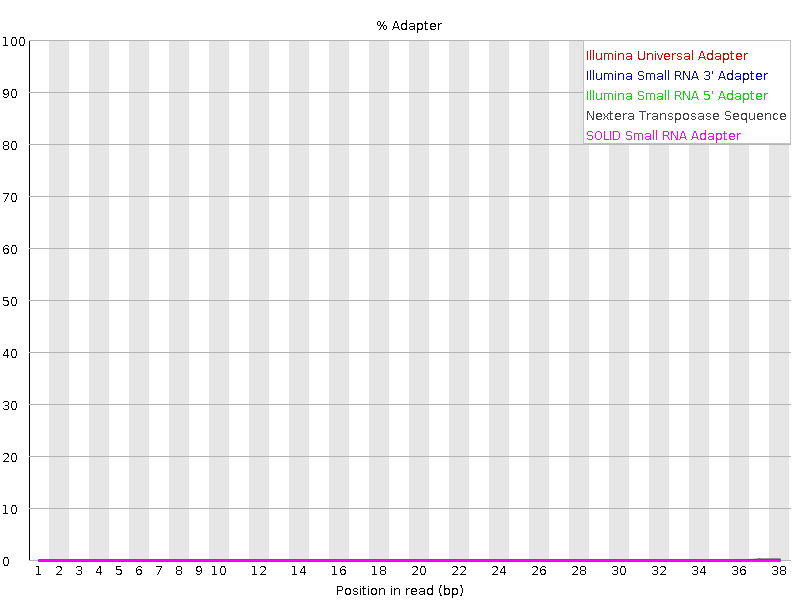

In [1]:
import zipfile
from PIL import Image
from io import BytesIO
from IPython.display import display

report = '../data/tmp/reports/SRR3438555_1_fastqc.zip'
with zipfile.ZipFile(report, 'r') as zipObj:
    img = BytesIO(zipObj.read('SRR3438555_1_fastqc/Images/adapter_content.png'))
    im = Image.open(img)
    display(im)

In the summary text file produced by FastQc, we can quickly check if the a file passes the adapter content. 

In [2]:
import re
import glob
import pandas as pd
report_path = '../data/tmp/reports'
all_zip = sorted(glob.glob(report_path+'/*.zip'))
for z in all_zip:
    f_name = re.findall('reports/(.*)\.zip', z)[0]
    with zipfile.ZipFile(z, 'r') as zipObj:
        with zipObj.open(f_name+'/summary.txt') as f:
            adapter = f.readlines()[9]
            print(adapter.decode('utf-8'))

PASS	Adapter Content	SRR3438555_1.fastq.gz

PASS	Adapter Content	SRR3438555_2.fastq.gz

PASS	Adapter Content	SRR3438556_1.fastq.gz

PASS	Adapter Content	SRR3438556_2.fastq.gz

PASS	Adapter Content	SRR3438557_1.fastq.gz

PASS	Adapter Content	SRR3438557_2.fastq.gz

PASS	Adapter Content	SRR3438558_1.fastq.gz

PASS	Adapter Content	SRR3438558_2.fastq.gz

PASS	Adapter Content	SRR3438559_1.fastq.gz

PASS	Adapter Content	SRR3438559_2.fastq.gz

PASS	Adapter Content	SRR3438560_1.fastq.gz

PASS	Adapter Content	SRR3438560_2.fastq.gz

PASS	Adapter Content	SRR3438561_1.fastq.gz

PASS	Adapter Content	SRR3438561_2.fastq.gz

PASS	Adapter Content	SRR3438562_1.fastq.gz

PASS	Adapter Content	SRR3438562_2.fastq.gz

PASS	Adapter Content	SRR3438563_1.fastq.gz

PASS	Adapter Content	SRR3438563_2.fastq.gz

PASS	Adapter Content	SRR3438564_1.fastq.gz

PASS	Adapter Content	SRR3438564_2.fastq.gz



## 2. Cutadapt

In this step, we will cut out the adapter content out of the files that did not pass the initial quality check. Since all the sample files we chose do not have adapters, we will reserve this part for future use.